- Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs.
- To follow up on a question that I received recently, I wanted to clarify that feature scaling such as [standardization] does not change the overall results of an LDA and thus may be optional

In [34]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn import decomposition


### Read the dataset

In [23]:
df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# conver class label into number
df['class label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df['class label']=df['class label'].map({'Iris-setosa':1,
                                       'Iris-versicolor':2,'Iris-virginica':3})

In [10]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### LDA via scikit-learn

In [13]:
sklearn_lda = LDA(n_components=2)

In [22]:
X_lda_sklearn = sklearn_lda.fit_transform(df.iloc[:,[0,1,2,3]], df['class label'])

In [26]:
sklearn_lda.explained_variance_ratio_

array([0.99147248, 0.00852752])

In [27]:
lda_df = pd.DataFrame(data = X_lda_sklearn, columns = ['LC1','LC2'])

In [28]:
lda_df['Class']= df['class label']

<Figure size 576x576 with 0 Axes>

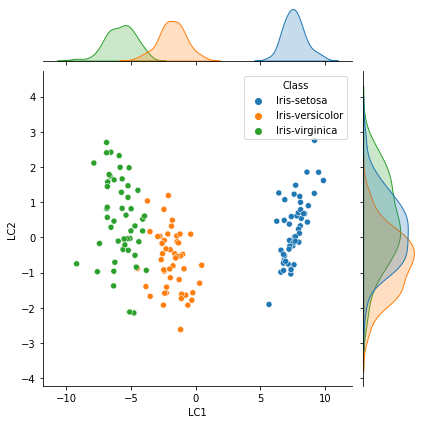

In [33]:
plt.figure(figsize = (8, 8))
sns.jointplot(data=lda_df,  x = 'LC1', 
              y = 'LC2', hue='Class')              
plt.show();
# LC1 explain 99% of the difference between clusters

### PCA via scikit-learn

In [37]:
pca= sklearn.decomposition.PCA(2)

In [38]:
pca_result= pca.fit_transform(df.iloc[:,[0,1,2,3]])

In [39]:
pca_df = pd.DataFrame(data = pca_result, columns = ['PC1','PC2'])

In [41]:
pca_df['Class']= df['class label']

<Figure size 576x576 with 0 Axes>

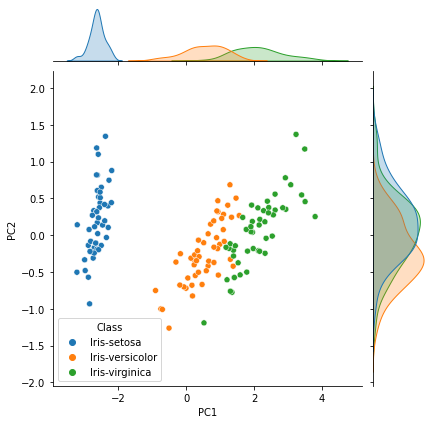

In [43]:
plt.figure(figsize = (8, 8))
sns.jointplot(data=pca_df,  x = 'PC1', 
              y = 'PC2', hue='Class')              
plt.show();
#Where the PCA accounts for the most variance in the whole dataset, 
#the LDA gives us the axes that account for the most variance between the individual classes.